In [7]:
import xarray as xr, numpy as np, xgcm
import matplotlib.pyplot as plt
import sys, xesmf as xe
import pandas as pd
import matplotlib.animation as animation
from IPython.display import HTML
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker, string
import cartopy.feature as cfeature
sys.path.append('ECCOv4-py')
import ecco_v4_py as ecco
import warnings
warnings.filterwarnings("ignore")

In [8]:
ds = xr.open_dataset("./term_Cori.nc")
var0 = np.abs(ds.term_Cori.where(ds.term_Cori != 0, np.nan))
var0 = var0.assign_coords(time=pd.date_range(start='1992-01-01', end='2019-12-31', freq='ME'))

ds = xr.open_dataset("./term_Sstr.nc")
var01= np.abs(ds.term_Sstr.where(ds.term_Sstr != 0, np.nan))
var01=var01.assign_coords(time=pd.date_range(start='1992-01-01', end='2019-12-31', freq='ME'))

ds = xr.open_dataset("./term_Topo.nc")
var02= np.abs(ds.term_Topo.where(ds.term_Topo != 0, np.nan))
var02=var02.assign_coords(time=pd.date_range(start='1992-01-01', end='2019-12-31', freq='ME'))

ds = xr.open_dataset("./term_Adv.nc")
var03= np.abs(ds.term_Adv.where(ds.term_Adv != 0, np.nan))
var03=var03.assign_coords(time=pd.date_range(start='1992-01-01', end='2019-12-31', freq='ME'))

ds = xr.open_dataset("./term_Diss.nc")
var04= np.abs(ds.term_Diss.where(ds.term_Diss != 0, np.nan))
var04=var04.assign_coords(time=pd.date_range(start='1992-01-01', end='2019-12-31', freq='ME'))

ds = xr.open_dataset("./term_time.nc")
var05= np.abs(ds.term_time.where(ds.term_time != 0, np.nan))
var05=var05.assign_coords(time=pd.date_range(start='1992-01-01', end='2019-12-31', freq='ME'))

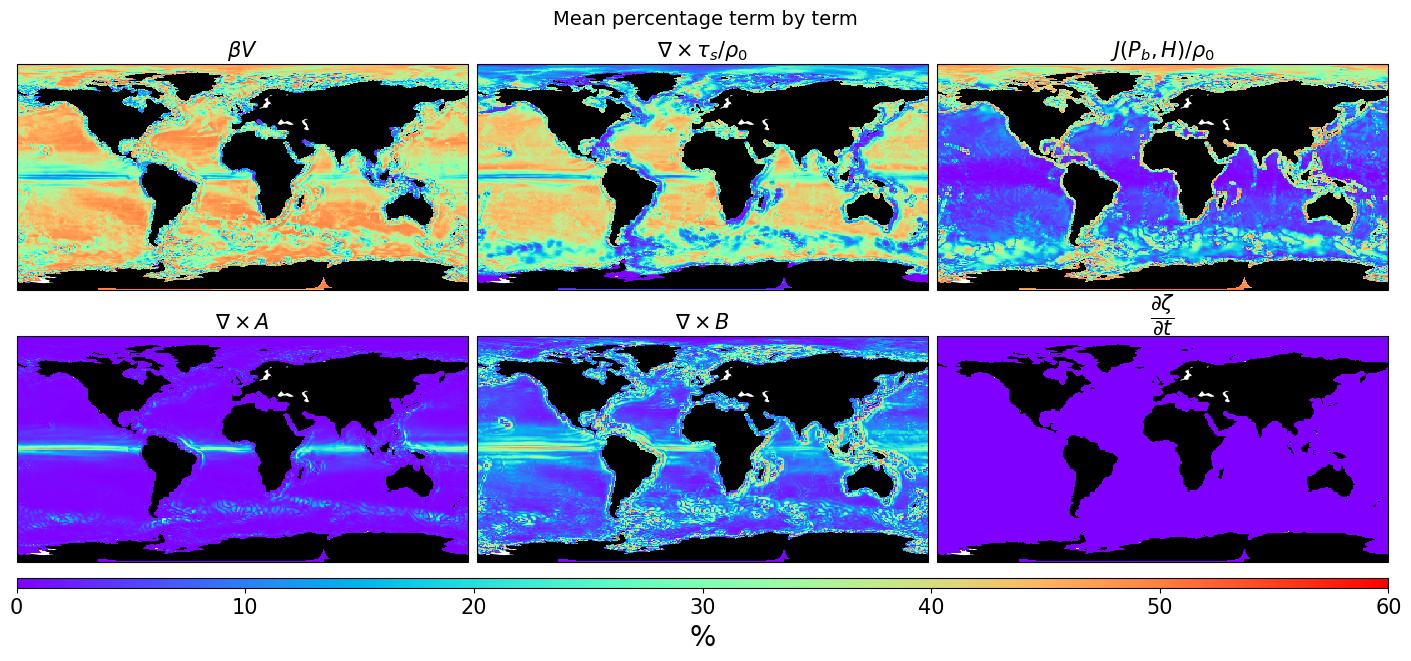

In [9]:
fig, ax = plt.subplots(nrows=2,ncols=3,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(14,6.5),constrained_layout=True)

cmap="rainbow"
z00 = ax[0,0].pcolormesh(ds.longitude, ds.latitude, 100*var0.sum(dim="time")/(var0.sum(dim="time")+
                                                                              var01.sum(dim="time")+
                                                                              var02.sum(dim="time")+
                                                                              var03.sum(dim="time")+
                                                                              var04.sum(dim="time")+
                                                                              var05.sum(dim="time")
                                                                             ),
                         vmin=0,vmax=60,
                         cmap=cmap,transform = ccrs.PlateCarree(),rasterized=True,)
ax[0,0].set_title(r"$ \beta V$",size=15, fontweight="bold")

z00 = ax[0,1].pcolormesh(ds.longitude, ds.latitude, 100*var01.sum(dim="time")/(var0.sum(dim="time")+
                                                                              var01.sum(dim="time")+
                                                                              var02.sum(dim="time")+
                                                                              var03.sum(dim="time")+
                                                                              var04.sum(dim="time")+
                                                                              var05.sum(dim="time")
                                                                             ),
                         vmin=0,vmax=60,
                         cmap=cmap,transform = ccrs.PlateCarree(),rasterized=True,)
ax[0,1].set_title(r"$ \nabla \times \tau_{s}/\rho_{0}$",size=15, fontweight="bold")

z00 = ax[0,2].pcolormesh(ds.longitude, ds.latitude, 100*var02.sum(dim="time")/(var0.sum(dim="time")+
                                                                              var01.sum(dim="time")+
                                                                              var02.sum(dim="time")+
                                                                              var03.sum(dim="time")+
                                                                              var04.sum(dim="time")+
                                                                              var05.sum(dim="time")
                                                                             ),
                         vmin=0,vmax=60,
                         cmap=cmap,transform = ccrs.PlateCarree(),rasterized=True,)
ax[0,2].set_title(r"$ J(P_{b},H)/\rho_{0}$",size=15, fontweight="bold")

z00 = ax[1,0].pcolormesh(ds.longitude, ds.latitude, 100*var03.sum(dim="time")/(var0.sum(dim="time")+
                                                                              var01.sum(dim="time")+
                                                                              var02.sum(dim="time")+
                                                                              var03.sum(dim="time")+
                                                                              var04.sum(dim="time")+
                                                                              var05.sum(dim="time")
                                                                             ),
                         vmin=0,vmax=60,
                         cmap=cmap,transform = ccrs.PlateCarree(),rasterized=True,)
ax[1,0].set_title(r"$ \nabla \times A$",size=15, fontweight="bold")

z00 = ax[1,1].pcolormesh(ds.longitude, ds.latitude, 100*var04.sum(dim="time")/(var0.sum(dim="time")+
                                                                              var01.sum(dim="time")+
                                                                              var02.sum(dim="time")+
                                                                              var03.sum(dim="time")+
                                                                              var04.sum(dim="time")+
                                                                              var05.sum(dim="time")
                                                                             ),
                         vmin=0,vmax=60,
                         cmap=cmap,transform = ccrs.PlateCarree(),rasterized=True,)
ax[1,1].set_title(r"$ \nabla \times B$",size=15, fontweight="bold")

z00 = ax[1,2].pcolormesh(ds.longitude, ds.latitude, 100*var05.sum(dim="time")/(var0.sum(dim="time")+
                                                                              var01.sum(dim="time")+
                                                                              var02.sum(dim="time")+
                                                                              var03.sum(dim="time")+
                                                                              var04.sum(dim="time")+
                                                                              var05.sum(dim="time")
                                                                             ),
                         vmin=0,vmax=60,
                         cmap=cmap,transform = ccrs.PlateCarree(),rasterized=True,)
ax[1,2].set_title(r"$ \dfrac{\partial \zeta }{\partial t}$",size=15, fontweight="bold")


cb = plt.colorbar(z00, ax=ax, orientation='horizontal', pad =0.03, aspect=140, fraction=0.03)
cb.ax.tick_params(labelsize=15)
cb.set_label(label="%", size=20)
fig.suptitle("Mean percentage term by term", fontsize=14)


for i in range(2):
    for j in range(3):
        gl = ax[i,j].gridlines(crs=ccrs.PlateCarree(), draw_labels=False,
                               linewidth=1, color='black', alpha=.0,)
        ax[i,j].add_feature(cfeature.LAND, color='black')

In [5]:
var_0 = 100*var0.sum(dim="time")/(var0.sum(dim="time")+
                                  var01.sum(dim="time")+
                                  var02.sum(dim="time")+
                                  var03.sum(dim="time")+
                                  var04.sum(dim="time")+
                                  var05.sum(dim="time")
                                 )
var_1 = 100*var01.sum(dim="time")/(var0.sum(dim="time")+
                                  var01.sum(dim="time")+
                                  var02.sum(dim="time")+
                                  var03.sum(dim="time")+
                                  var04.sum(dim="time")+
                                  var05.sum(dim="time")
                                 )
var_2 = 100*var02.sum(dim="time")/(var0.sum(dim="time")+
                                  var01.sum(dim="time")+
                                  var02.sum(dim="time")+
                                  var03.sum(dim="time")+
                                  var04.sum(dim="time")+
                                  var05.sum(dim="time")
                                 )
var_3 = 100*var03.sum(dim="time")/(var0.sum(dim="time")+
                                  var01.sum(dim="time")+
                                  var02.sum(dim="time")+
                                  var03.sum(dim="time")+
                                  var04.sum(dim="time")+
                                  var05.sum(dim="time")
                                 )
var_4 = 100*var04.sum(dim="time")/(var0.sum(dim="time")+
                                  var01.sum(dim="time")+
                                  var02.sum(dim="time")+
                                  var03.sum(dim="time")+
                                  var04.sum(dim="time")+
                                  var05.sum(dim="time")
                                 )

var_5 = 100*var05.sum(dim="time")/(var0.sum(dim="time")+
                                  var01.sum(dim="time")+
                                  var02.sum(dim="time")+
                                  var03.sum(dim="time")+
                                  var04.sum(dim="time")+
                                  var05.sum(dim="time")
                                 )

In [6]:
mask = var_5*0

mask = xr.where((var_0 + var_1) > 80, 1, mask)

cond = ((var_0 + var_1 + var_2) > 80) & (mask == 0)

mask = xr.where(cond, 2, mask)

cond = ((var_0 + var_2 + var_3) > 80) & (mask == 0)

mask = xr.where(cond, 3, mask)

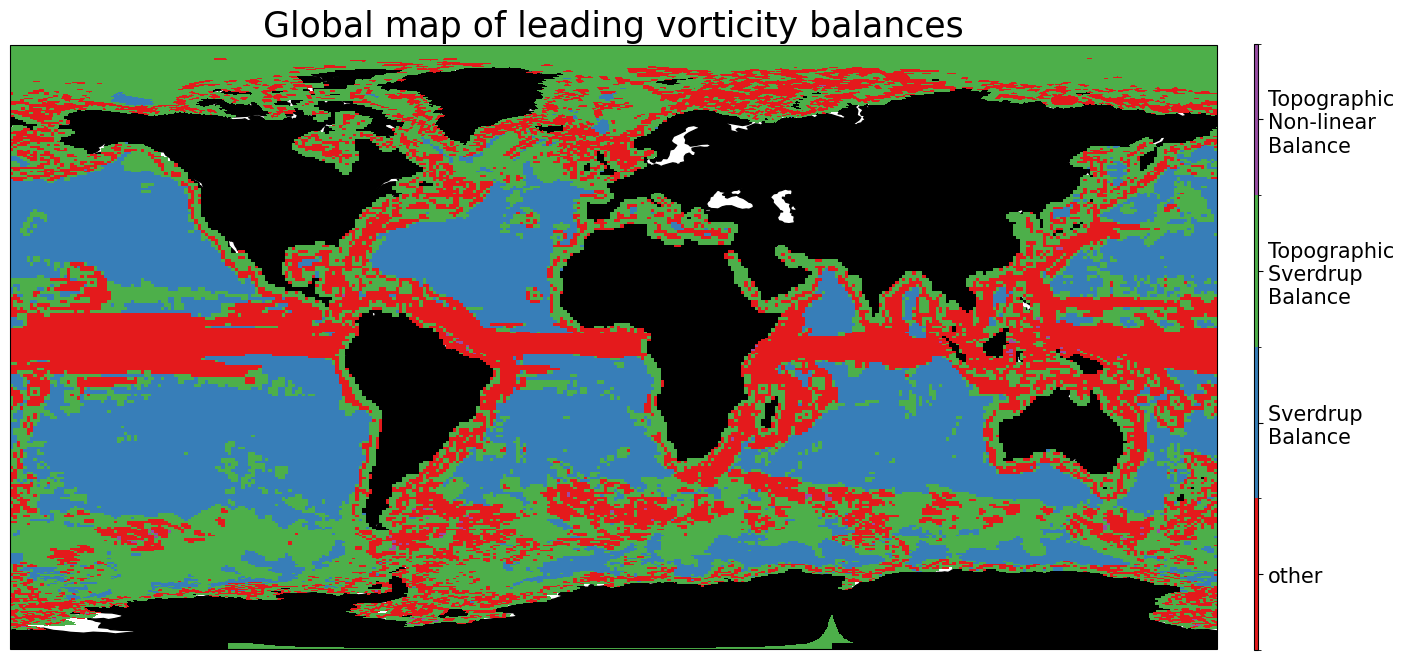

In [31]:
from matplotlib.colors import ListedColormap, BoundaryNorm

fig, ax = plt.subplots(nrows=1,ncols=1,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(14,6.5),constrained_layout=True)

colors = ['lightgray', 'blue', 'orange', 'red']  
cmap = ListedColormap(colors)

bounds = [0, 1, 2, 3, 4]
norm = BoundaryNorm(bounds, cmap.N)

cmap="Set1"
z00 = ax.pcolormesh(ds.longitude, ds.latitude, mask,
                    norm=norm,
                         cmap=cmap,transform = ccrs.PlateCarree(),rasterized=True,)

ax.set_title("Global map of leading vorticity balances", size=25)

cb = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), 
                  ax=ax, 
                  orientation='vertical', 
                  pad =0.03, aspect=140, fraction=0.03,
                 ticks=[0.5, 1.5, 2.5, 3.5]
                 )

cb.ax.tick_params(labelsize=15)
cb.ax.set_yticklabels(['other', 'Sverdrup \nBalance', 'Topographic \nSverdrup \nBalance', 'Topographic \nNon-linear \nBalance'])

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False,
                               linewidth=1, color='black', alpha=.0,)
ax.add_feature(cfeature.LAND, color='black')
